In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [3]:
print(df.head())

   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3         

In [4]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [5]:
df= df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [6]:
df.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

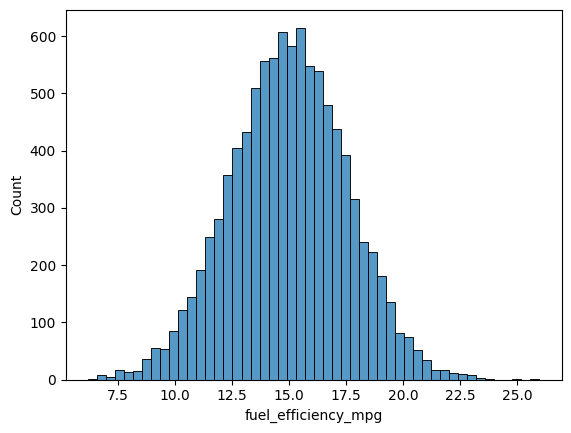

In [8]:
sns.histplot(df.fuel_efficiency_mpg , bins=50)

It does not have a long tail


## Question 1

In [9]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### The answer is 'horsepower'.

## Question 2

In [10]:
df['horsepower'].median()
print(df['horsepower'].median())

149.0


### The answer is 149

In [11]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test

In [12]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val + n_test]
df_train = df.iloc[n_val + n_test:]

In [13]:
len(df), len(df_val)+ len(df_test)+len(df_train)

(9704, 9704)

## Question 3

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
df_train_z = df_train.copy()
df_val_z = df_val.copy()


In [20]:
df_train_z['horsepower']= df_train_z['horsepower'].fillna(0)
df_val_z['horsepower'] = df_val_z['horsepower'].fillna(0)

In [23]:
X_train_0 = df_train_z.drop('fuel_efficiency_mpg', axis=1)
y_train_0 = df_train_z['fuel_efficiency_mpg']

X_val_0 = df_val_z.drop('fuel_efficiency_mpg', axis=1)
y_val_0 = df_val_z['fuel_efficiency_mpg']

In [26]:
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)
y_pred_0 = model_0.predict(X_val_0)
rmse_0 = round(np.sqrt(mean_squared_error(y_val_0, y_pred_0)), 2)

In [27]:
rmse_0

0.51

In [28]:
mean_hp = df_train['horsepower'].mean()


In [30]:
df_train_m = df_train.copy()
df_val_m = df_val.copy()

In [31]:
df_train_m.loc[:, 'horsepower'] = df_train_m['horsepower'].fillna(mean_hp)
df_val_m.loc[:, 'horsepower'] = df_val_m['horsepower'].fillna(mean_hp)


In [32]:
X_train_mean = df_train_m.drop('fuel_efficiency_mpg', axis=1)
y_train_mean = df_train_m['fuel_efficiency_mpg']
X_val_mean = df_val_m.drop('fuel_efficiency_mpg', axis=1)
y_val_mean = df_val_m['fuel_efficiency_mpg']


In [34]:
model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train_mean)
y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = round(np.sqrt(mean_squared_error(y_val_mean, y_pred_mean)), 2)
               

In [35]:
rmse_mean

0.51

In [38]:
rmse_mean ==rmse_0

True

### Both are equally good.

## Question 4

In [48]:
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error



In [49]:
X_train = df_train_z[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']]
y_train = df_train_z['fuel_efficiency_mpg']
X_val = df_val_z[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']]
y_val = df_val_z['fuel_efficiency_mpg']


In [50]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]


In [83]:
for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    print(r," -> " ,round(rmse, 2))


0  ->  0.52
0.01  ->  0.52
0.1  ->  0.52
1  ->  0.52
5  ->  0.52
10  ->  0.52
100  ->  0.52


### r=0

## Question 5

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
rmse_scores = []

In [60]:

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seeds:
    df_train, df_temp = train_test_split(df, test_size=0.4, random_state=seed)
    df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=seed)
   

In [61]:
 df_train = df_train.fillna(0)
 df_val = df_val.fillna(0)

In [63]:
X_train = df_train.drop('fuel_efficiency_mpg', axis=1)
y_train = df_train['fuel_efficiency_mpg']
    
X_val = df_val.drop('fuel_efficiency_mpg', axis=1)
y_val = df_val['fuel_efficiency_mpg']
    

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse_scores.append(rmse)
round(rmse, 2)

0.52

In [67]:
std = np.std(rmse_scores)

In [80]:
round(std, 2)

0.0

### The std is 0

## Question 6

In [70]:
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=9)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=9)


In [71]:
df_full_train = pd.concat([df_train, df_val])

In [72]:
df_full_train = df_full_train.fillna(0)
df_test = df_test.fillna(0)

In [73]:
X_full_train = df_full_train.drop('fuel_efficiency_mpg', axis=1)
y_full_train = df_full_train['fuel_efficiency_mpg']

In [74]:
X_test = df_test.drop('fuel_efficiency_mpg', axis=1)
y_test = df_test['fuel_efficiency_mpg']

In [77]:
model = Ridge(alpha=0.001)
model.fit(X_full_train, y_full_train)
y_pred = model.predict(X_test)

In [78]:
rmse = root_mean_squared_error(y_test, y_pred)
round(rmse, 2)

0.52

### My RMSE is 0.52